# Plot P1D entries from different archives

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from lace.emulator import p1d_archive
from lace_manager.emulator import p1d_archive_Nyx
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

### Setup Gadget archive (Pedersen et al. 2021)

In [2]:
basedir='lace/emulator/sim_suites/Australia20/'
skewers_label='Ns500_wM0.05'
gadget=p1d_archive.archiveP1D(basedir=basedir,skewers_label=skewers_label,verbose=False)

In [3]:
plot_ylog=True
def plot_p1d_dependence(arxiv,tag):
    N=len(arxiv.data)
    print('N =',N)
    val=np.array([arxiv.data[i][tag] for i in range(N)])
    imin=np.argmin(val)
    imax=np.argmax(val)
    min_val=val[imin]
    max_val=val[imax]
    plt.figure(figsize=[10,4])
    # first power spectrum for delta_flux
    plt.subplot(1, 2, 1)
    for i in range(N):
        data=arxiv.data[i]
        k_Mpc=data['k_Mpc']
        p1d_Mpc=data['p1d_Mpc']
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)            
        else:
            plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D of $\delta_F$ as a function of '+tag)
    # then power spectrum for F  
    plt.subplot(1, 2, 2)
    for i in range(N):
        data=arxiv.data[i]
        k_Mpc=data['k_Mpc']
        p1d_Mpc=data['p1d_Mpc']
        mF=data['mF']
        p1d_Mpc_F = p1d_Mpc * mF**2
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc,k_Mpc*p1d_Mpc_F,color=col,label=label)
        else:
            plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc_F,color=col,label=label)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_F(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D of $F$ as a function of '+tag)

N = 990


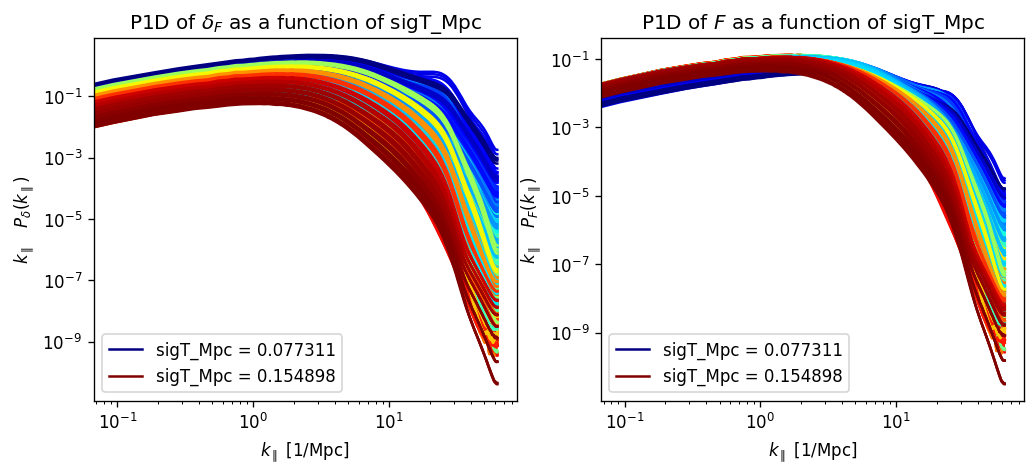

In [4]:
plot_p1d_dependence(gadget,'sigT_Mpc')

### Setup Nyx archive (Walther et al. 202?)

In [5]:
nyx_fname='/Users/font/Projects/LaCE_manager/lace_manager/emulator/sim_suites/test_nyx/large_nyx_models.hdf5'
nyx=p1d_archive_Nyx.archiveP1D_Nyx(fname=nyx_fname,verbosity=1)

will read Nyx file /Users/font/Projects/LaCE_manager/lace_manager/emulator/sim_suites/test_nyx/large_nyx_models.hdf5
number of samples 14
parameter names ['A_UVB', 'A_lya', 'A_s', 'H_0', 'Omega_m', 'h', 'n_lya', 'n_s', 'omega_m', 'sigma8']
will use redshift grid [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 5.0, 5.4]
thermal grid ['thermal_grid_0', 'thermal_grid_1', 'thermal_grid_10', 'thermal_grid_11', 'thermal_grid_12', 'thermal_grid_13', 'thermal_grid_14', 'thermal_grid_2', 'thermal_grid_3', 'thermal_grid_4', 'thermal_grid_5', 'thermal_grid_6', 'thermal_grid_7', 'thermal_grid_8', 'thermal_grid_9']
archive setup, containing 3150 entries


N = 3150


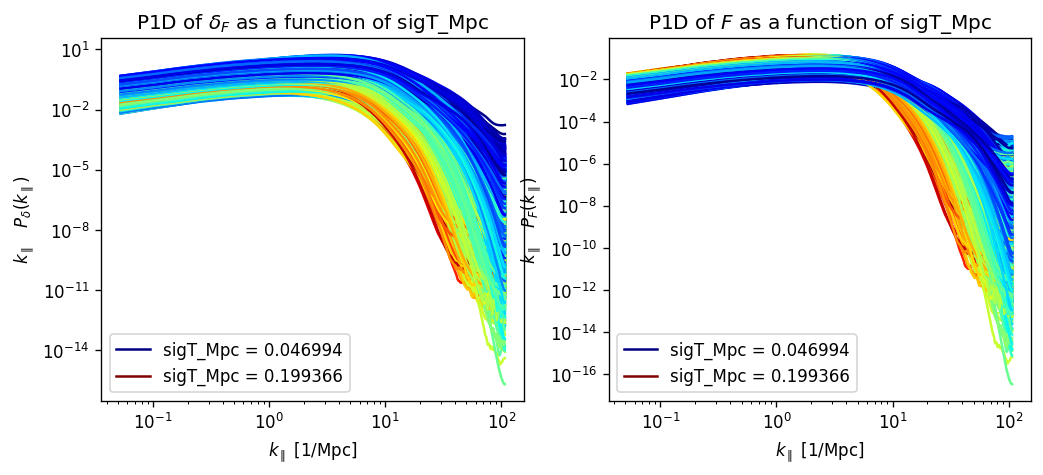

In [6]:
plot_p1d_dependence(nyx,'sigT_Mpc')